<div style="background-color: darkturquoise; padding: 10px; font-size: 60px; color: white; text-align: center; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5); line-height: 1.2;">

  <strong style="font-size: 50px;">Healthcare Fraud Buster</strong>

</div>


## Project Overview / Goal:    

This project aims to create a positive impact on the healthcare system by reducing insurance premiums, their by ensuring high-quality, affordable healthcare for all.


In [1]:
# Importing pandas for data manipulation and analysis
import pandas as pd
# Importing numpy for scientific computing
import numpy as np
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing colormaps for data visualization
from matplotlib import colormaps
list(colormaps)
# Importing seaborn for data visualization
import seaborn as sns
# Importing warnings to ignore warnings
import Draft_wrangle as w
# Importing sklearn for machine learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
# Importing sklearn for machine learning        
from sklearn.model_selection import train_test_split
# Import the DecisionTreeClassifier from scikit-learn 
from sklearn.tree import DecisionTreeClassifier
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
# Import the LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression
# Import warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, RobustScaler



<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
         <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">PLAN </strong> ---Acquire--- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


Initial Questions
 - What is the main objective of this project?
 - From where to obtain the data for this project?
 - What format is the data in, and what preprocessing steps are needed?
 - Are there any missing values or outliers that require attention?
 - Which features (variables) will be used as predictors in the models?
 - What types of machine learning models are suitable for the problem? 

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">ACQUIRE </strong> --- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


-   The functions acquire_test_data and acquire_train_data functions in the wrangle module acquires data 
from the .CSVs in 'https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/data' 
which has data from CMS(Center for Medicare & Medicaid Services )

- Acquired two sets(train,test) of four datasets 
    - The inpatient dataset comprises of 50025 rows and 30 columns.
    - The outpatient dataset comprises of 643578 rows and 27
     columns
    - The beneficiary dataset comprises of 202524 rows and 25 columns. 
    - 

- Each observation in the inpatient dataset represents a specific claim raised by a specific provider for a specific beneficiary who was an inpatient.

- Each observation in the outpatient dataset represents a specific claim raised by a specific provider for a specific beneficiary who was an outpatient.

- Each observation in the beneficiary dataset represents personal and medical informations of each beneficiary.


In [2]:
# call the function to acquire the data from wrangle file for test data
test_outpatient_df,test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()
# call the function to acquire the data from wrangle file for train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()


In [3]:
# print summary statistics
w.summarize_outliers(train_outpatient_df, k=1.5)

Shape of Data: 
(517737, 27)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null

In [4]:
# print summary statistics
w.summarize_outliers(train_inpatient_df, k=1.5)

Shape of Data: 
(40474, 30)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  Clm

In [5]:
# print summary statistics
w.summarize_outliers(train_beneficiary_df, k=1.5)

Shape of Data: 
(138556, 25)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 no

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire---<strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">PREPARE</strong> --- Explore --- Model --- Deliver
    </div>
</div>


### Combine fraud data


In [6]:
# Combine the dataframes vertically using pd.concat
combined_df = pd.concat([train_df, test_df])
# Sort the combined dataframe based on the 'Alphanumeric_Field' column
fraud_df = combined_df.sort_values(by='Provider')
# Sort the index of the sorted dataframe
fraud_df = fraud_df.reset_index(drop=True)
# Display the sorted dataframe
fraud_df.head()


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes
3,PRV51004,No
4,PRV51005,Yes


### Combine inpatiant data


In [7]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Combind outpatiant data

In [8]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Combind beneficiary data

In [9]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


### Prepare Datasets

In [10]:
beneficiary_df = w.prep_beneficiary_data(beneficiary_df)
w.beneficiary_label_encode(beneficiary_df)
beneficiary_df = w.beneficiary_OneHotLabel_encode(beneficiary_df)
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


In [11]:
inpatient_df = w.wrangle_inpatient(inpatient_df)
inpatient_df = w.create_features_inpatient(inpatient_df)
inpatient_df.head(3)

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY000000,PHY000000,2009-04-12,...,71590,2724,19889,5849,00000,000,000,000,6,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,PHY000000,2009-08-31,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,PHY000000,PHY324689,2009-09-17,...,32723,00000,00000,00000,00000,000,000,000,3,3


In [12]:
outpatient_df = w.wrangle_outpatient(outpatient_df)
outpatient_df = w.create_features_outpatient(outpatient_df)
outpatient_df.head(3)

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,clmdiagnosiscode_3,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY000000,PHY000000,78943,...,V1272,00000,00000,00000,00000,00000,00000,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,PHY000000,PHY000000,6115,...,00000,00000,00000,00000,00000,00000,00000,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,PHY000000,PHY000000,2723,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0


In [13]:
fraud_df = w.wrangle_fraud(fraud_df)
fraud_df.head()

,provider,potentialfraud,potentialfraud_encoded
0,PRV51001,No,0
2,PRV51003,Yes,1
3,PRV51004,No,0
4,PRV51005,Yes,1
6,PRV51007,No,0


### Join dataframes

In [15]:
outpatient_df = w.merge_outpatient_fraud(beneficiary_df, outpatient_df, fraud_df)
inpatient_df = w.merge_inpatient_fraud(beneficiary_df, inpatient_df, fraud_df)

In [16]:
outpatient_df.head(3)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud,potentialfraud_encoded
0,BENE11002,1,0,0,39,280,12,12,1,1,...,00000,00000,00000,00000,00000,0.0,56409,0.0,Yes,1
1,BENE11007,0,1,0,45,610,12,12,0,0,...,72887,8448,00000,00000,00000,0.0,71691,20.0,No,0
2,BENE11007,0,1,0,45,610,12,12,0,0,...,00000,00000,00000,00000,00000,0.0,78099,0.0,No,0


In [17]:
inpatient_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud,potentialfraud_encoded
0,BENE11001,0,0,0,39,230,12,12,0,1,...,19889,5849,00000,000,000,000,6.0,3.0,Yes,1
1,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,7092.0,000,000,2.0,3.0,No,0
2,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,000,000,000,3.0,3.0,No,0
3,BENE11001,0,0,0,39,230,12,12,0,1,...,19889,5849,00000,000,000,000,6.0,3.0,Yes,1
4,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,7092.0,000,000,2.0,3.0,No,0


In [18]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

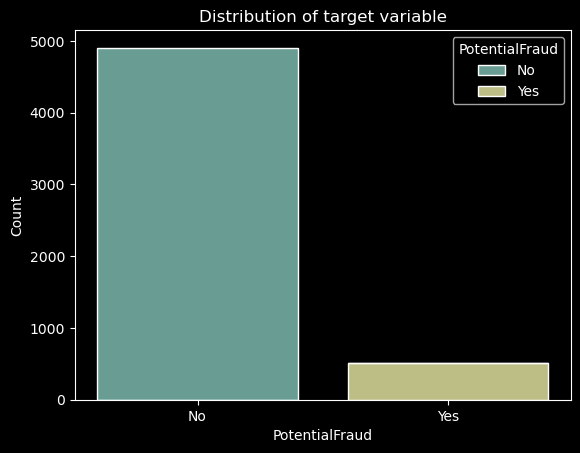

In [ ]:
# Distribution of target variable
sns.histplot(data=train_df, x='PotentialFraud', hue='PotentialFraud', multiple='stack', shrink=.8)
plt.title('Distribution of target variable')
plt.show()

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare--- <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> EXPLORE</strong> --- Model --- Deliver
    </div>
</div>


## Split

- After understanding the data, perform the train-test split

In [ ]:
def split_data(df: pd.DataFrame) -> pd.DataFrame:
    '''splits data into train test and validate dataframes'''
    train, test = train_test_split(df, test_size=.15, random_state=117, stratify=df.potentialfraud)
    train, validate = train_test_split(train, test_size=.15, random_state=117, stratify=train.potentialfraud)
    return train, validate, test

sep_line = '=' * 60 

In [ ]:
train_out, validate_out, test_out = split_data(outpatient_df)
train_in, validate_in, test_in = split_data(inpatient_df)

In [ ]:
# View the split 
print(f'Outpatient Train-> {train_out.shape}')
print(f'Outpatient Validate -> {validate_out.shape}')
print(f'Outpatient Test -> {test_out.shape}')
print(sep_line)
print(f'Inpatient Train -> {train_in.shape}')
print(f'Inpatient Validate -> {validate_in.shape}')
print(f'Inpatient Test -> {test_in.shape}')

Outpatient Train-> (540077, 55)
Outpatient Validate -> (95308, 55)
Outpatient Test -> (112127, 55)
Inpatient Train -> (42613, 63)
Inpatient Validate -> (7520, 63)
Inpatient Test -> (8848, 63)


In [ ]:
train_in.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud
2811,BENE21707,0,0,0,36,680,12,12,1,1,...,2449,42731,42732,00000,000,000,000,-0.2,3.0,Yes
23989,BENE55389,1,0,0,25,10,12,12,0,0,...,0416,34590,5939,00000,2101.0,000,000,4.2,3.0,Yes
4692,BENE19276,1,2,0,5,30,12,12,1,1,...,4019,40390,00000,00000,8102.0,000,000,-0.4,3.0,No
36353,BENE78054,0,0,0,33,730,12,12,0,0,...,2724,53081,5853,00000,9904.0,000,000,-0.2,3.0,Yes
40288,BENE90677,0,0,1,10,120,12,12,0,1,...,7140,2724,V4581,00000,8181.0,000,000,-0.2,3.0,Yes


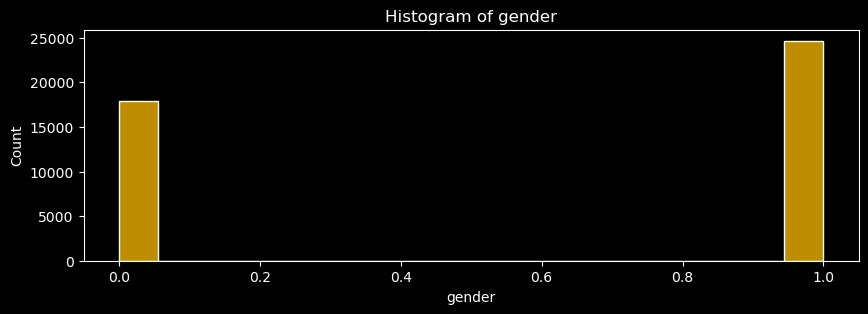

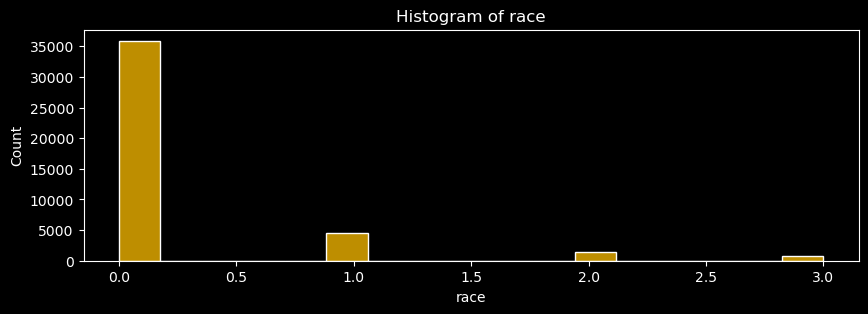

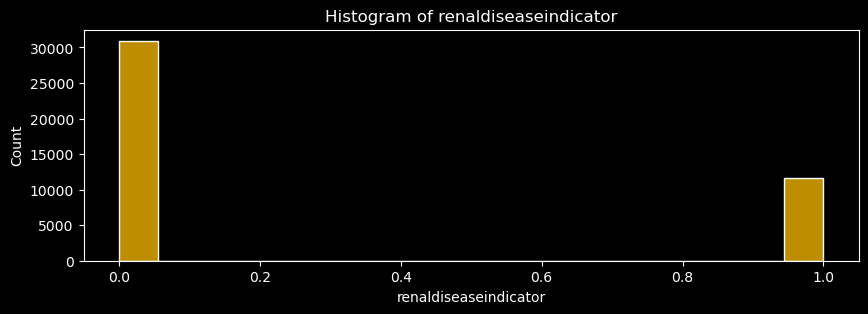

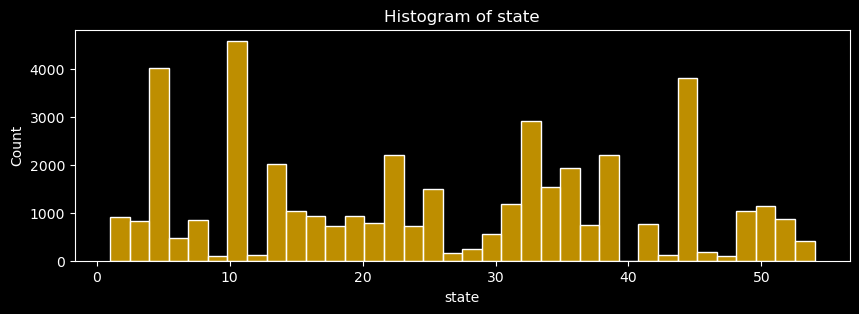

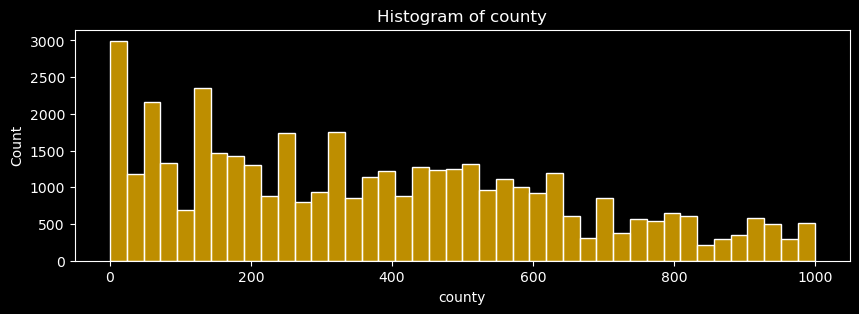

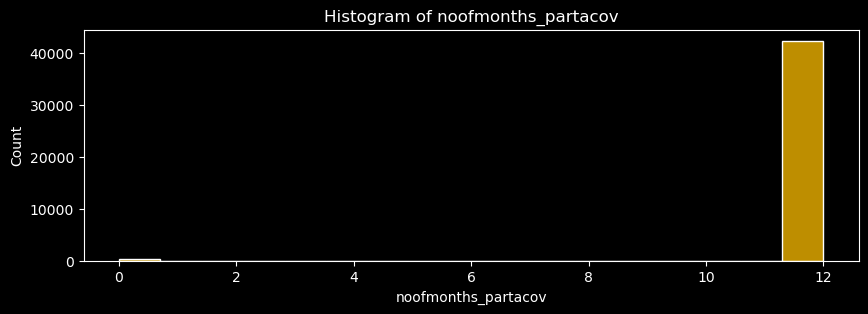

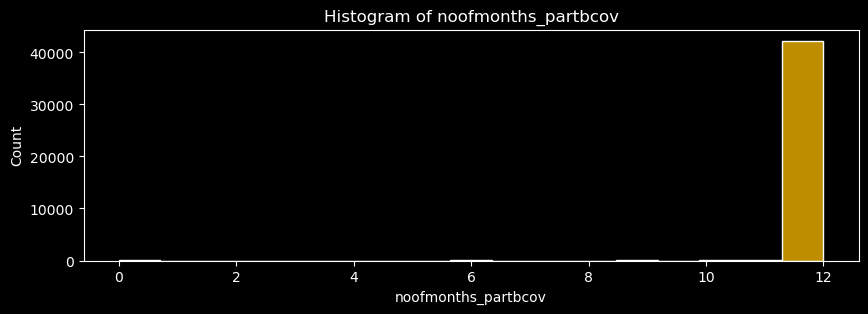

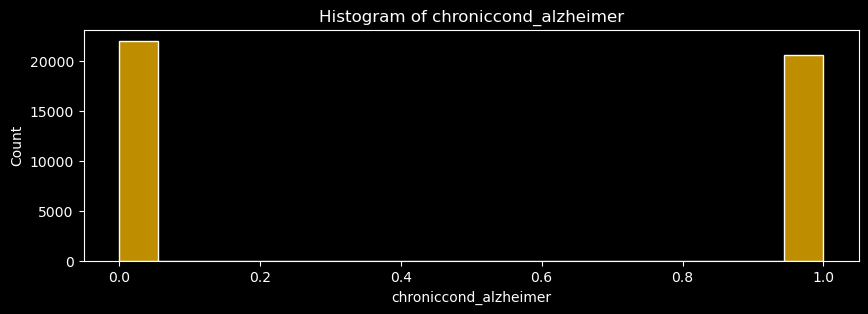

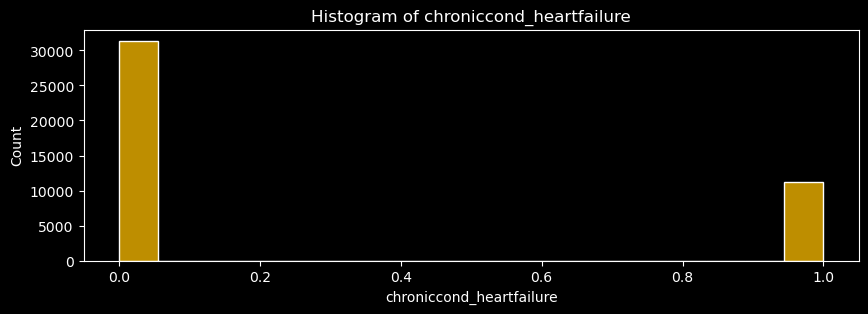

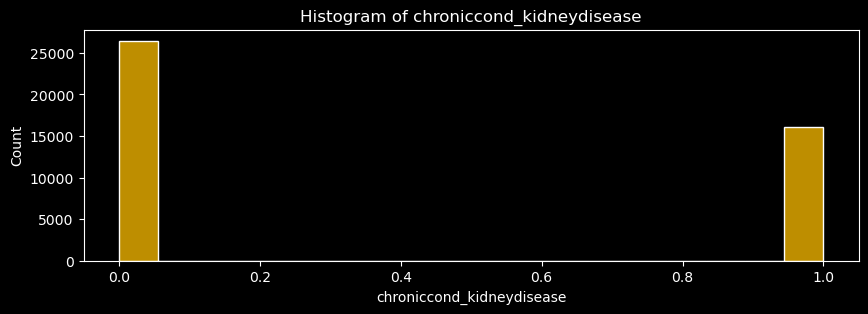

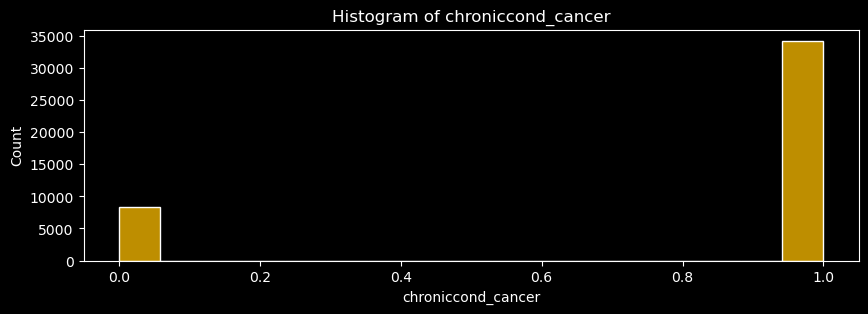

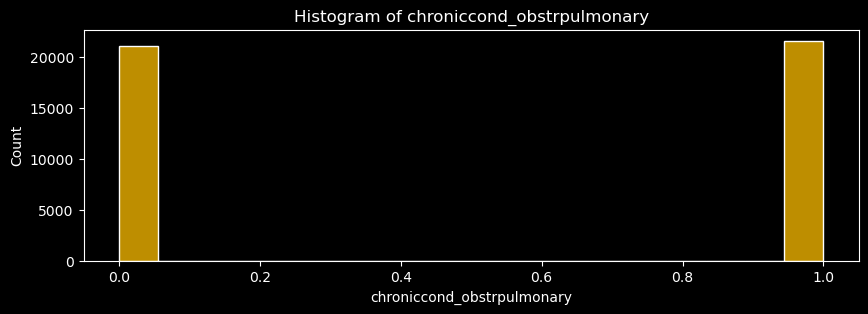

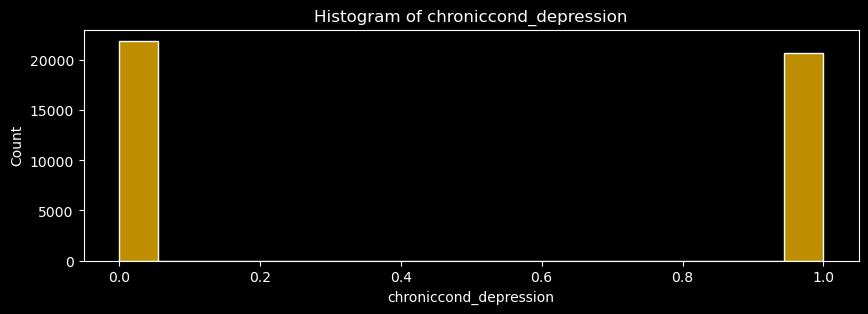

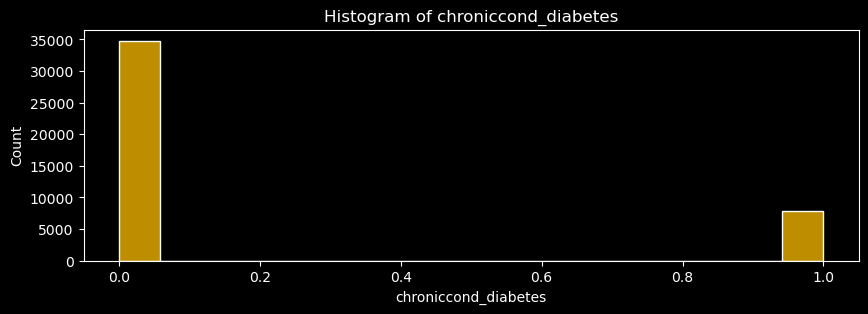

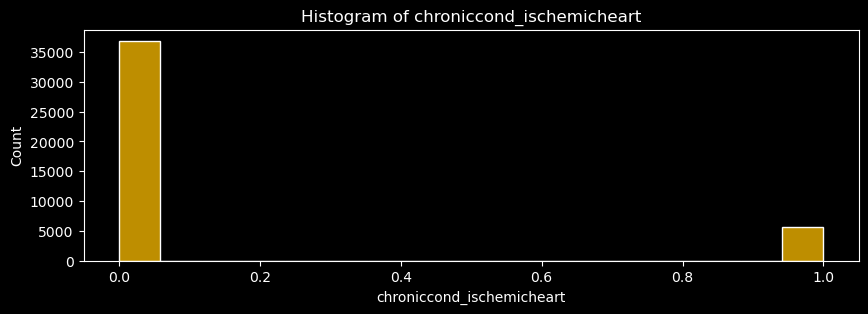

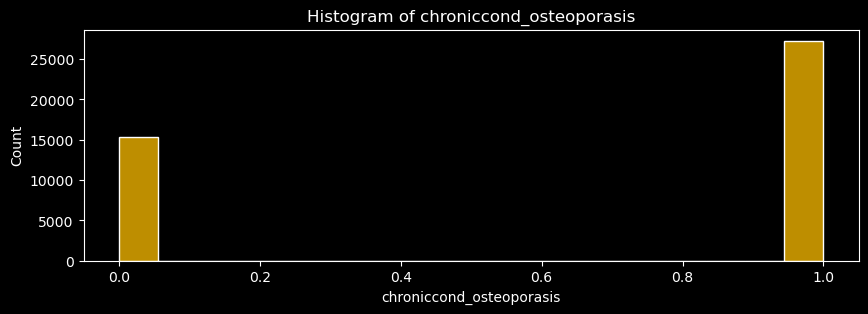

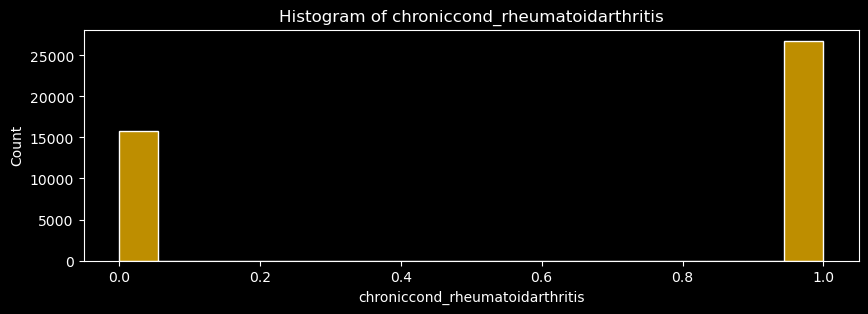

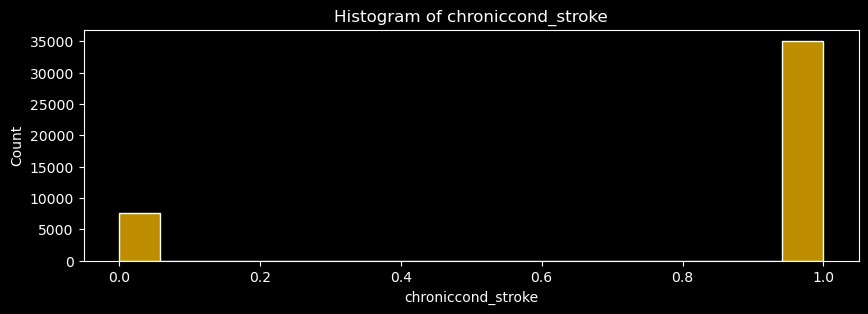

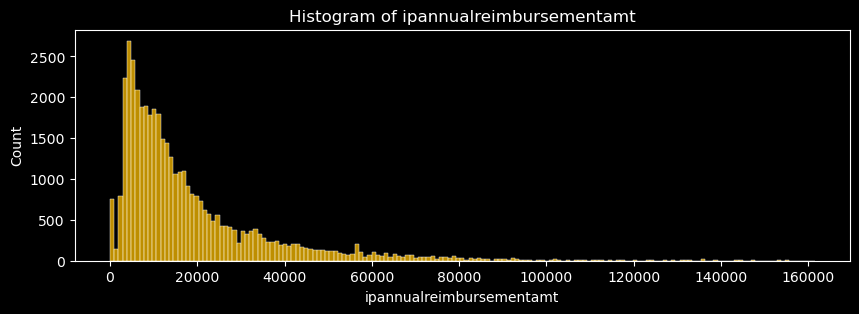

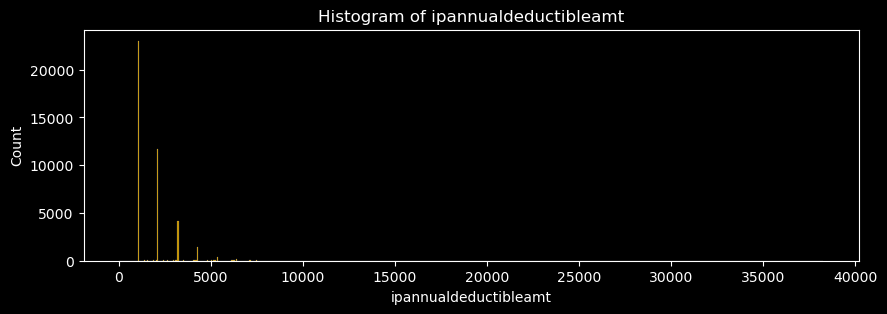

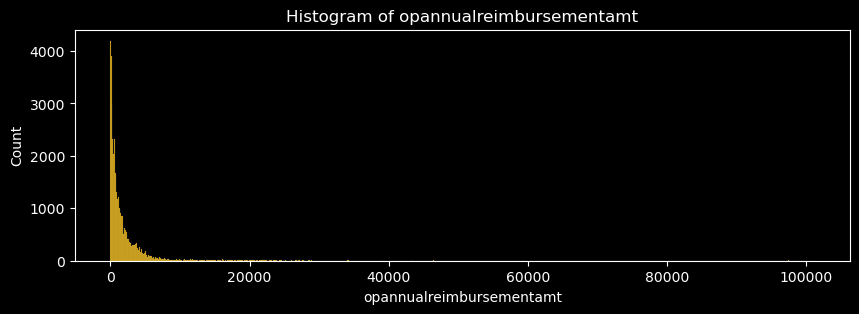

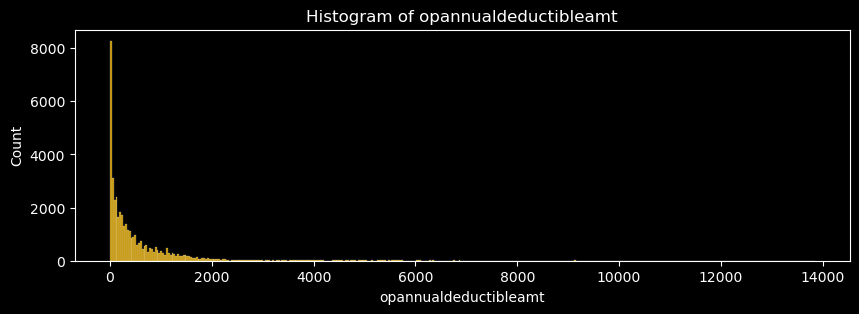

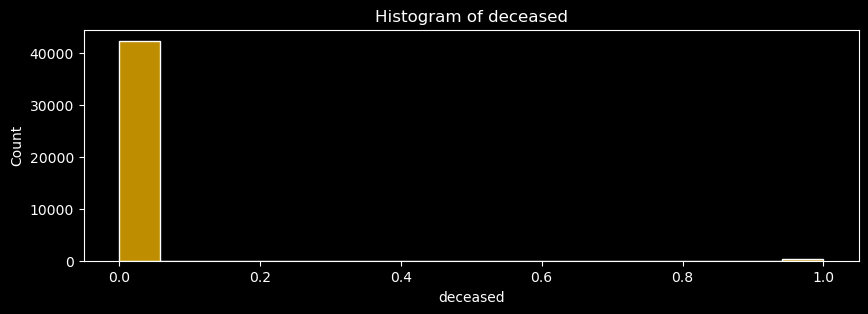

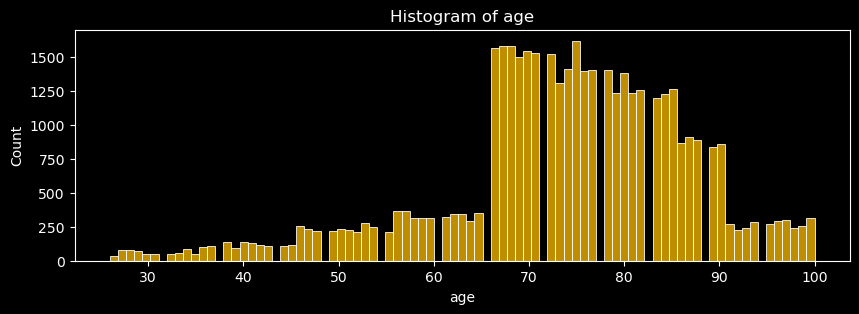

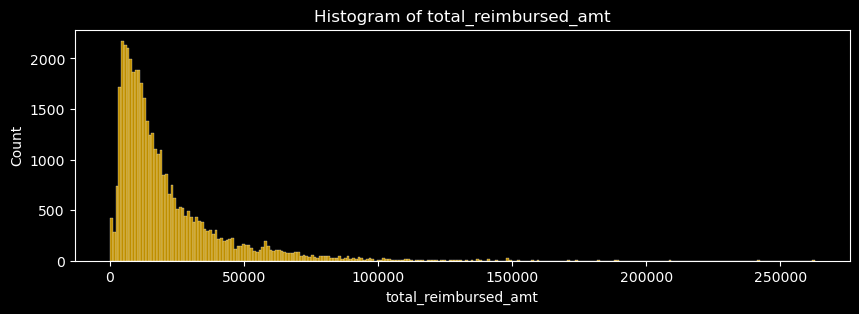

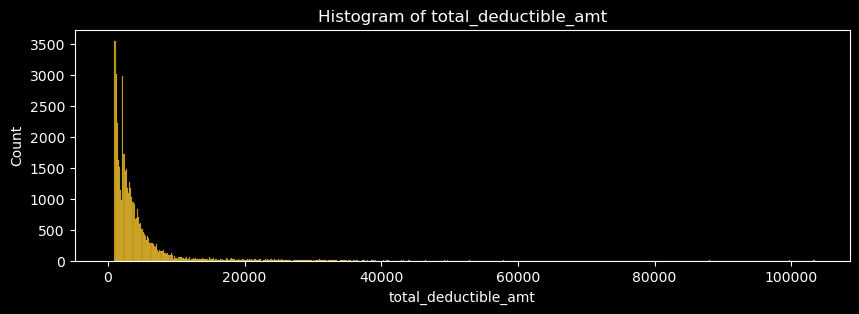

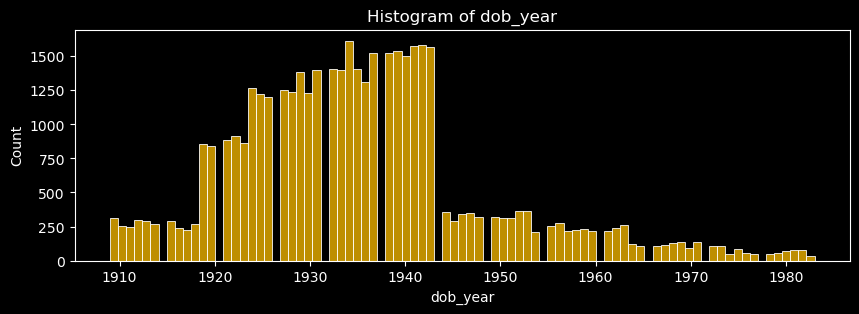

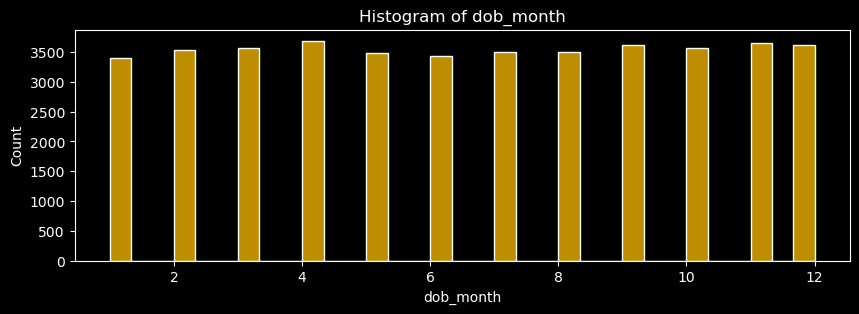

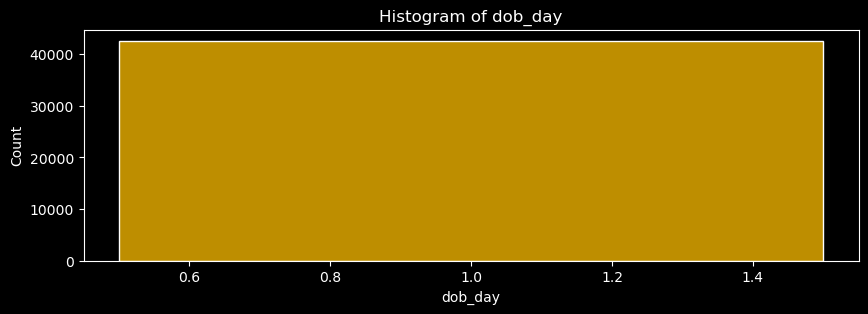

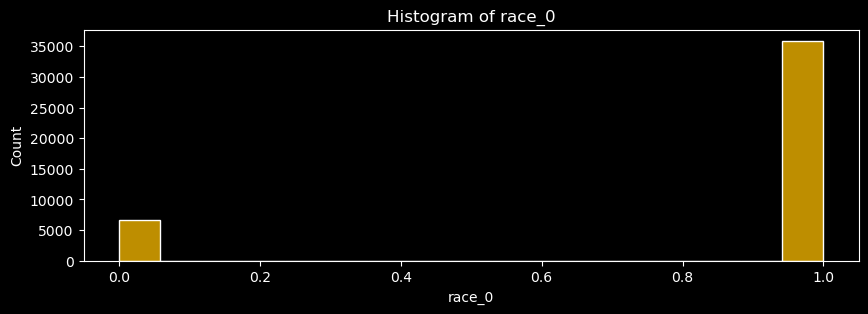

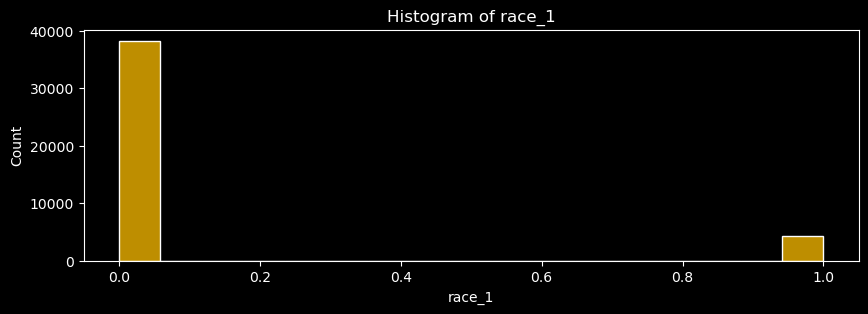

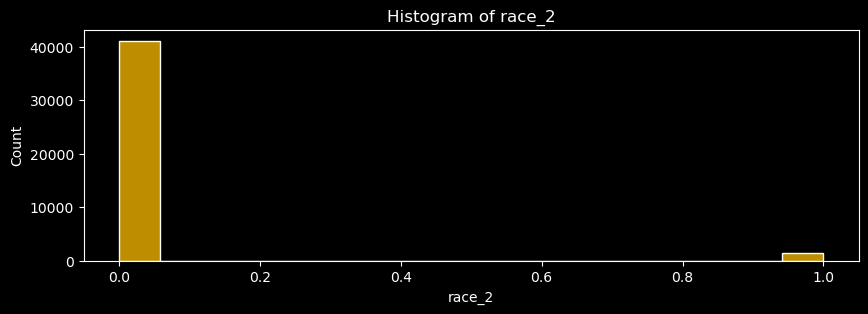

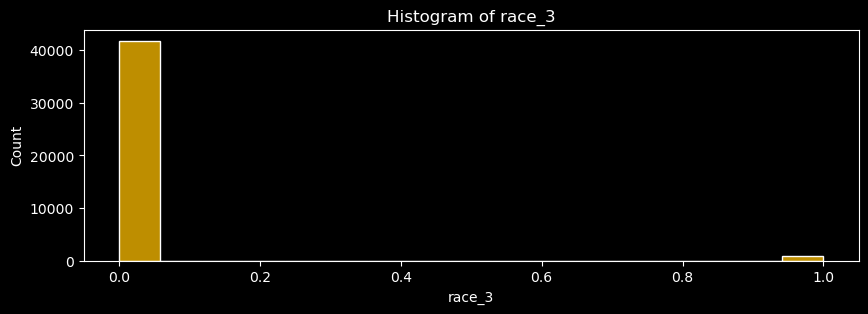

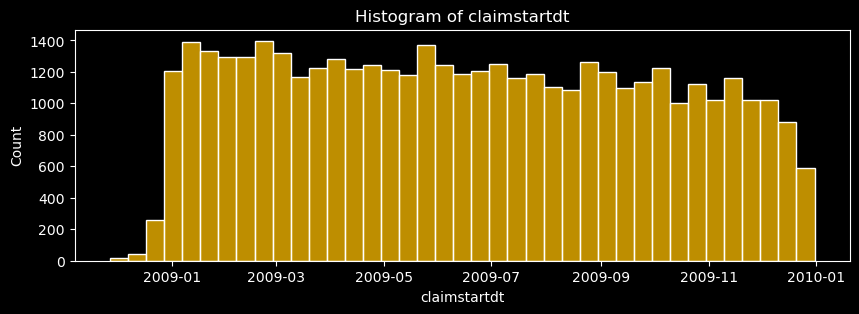

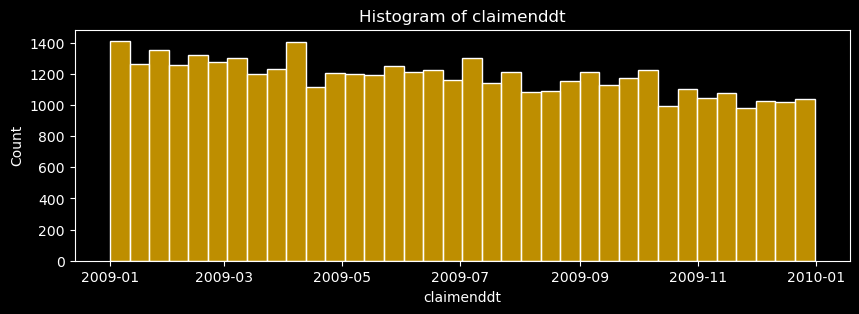

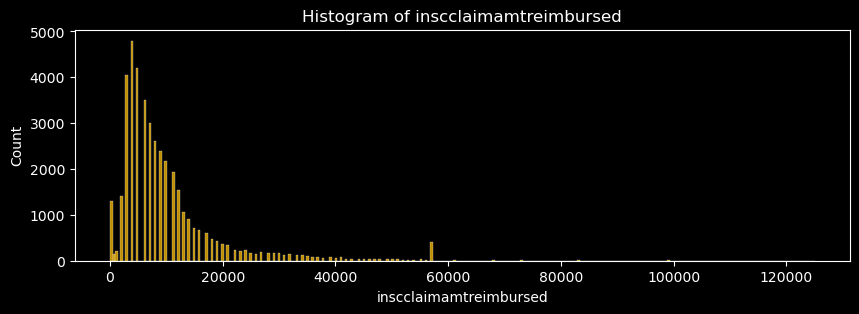

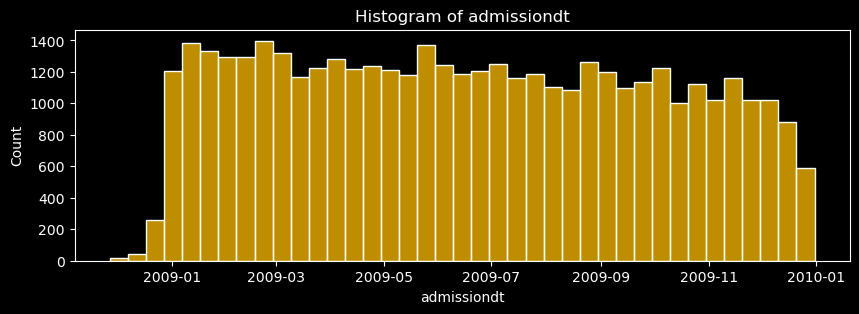

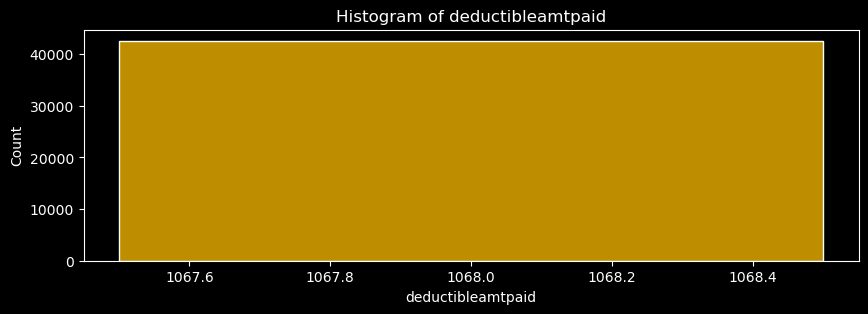

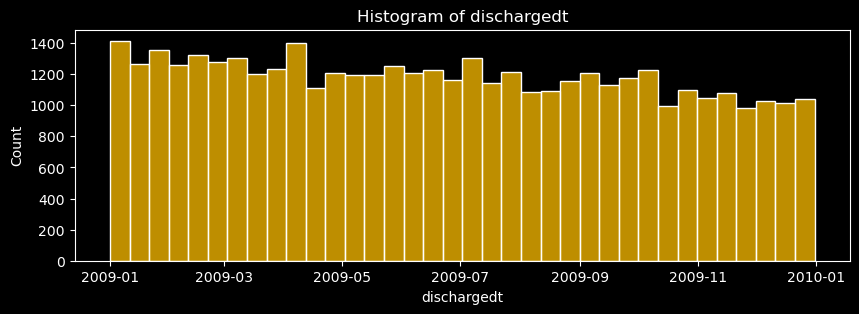

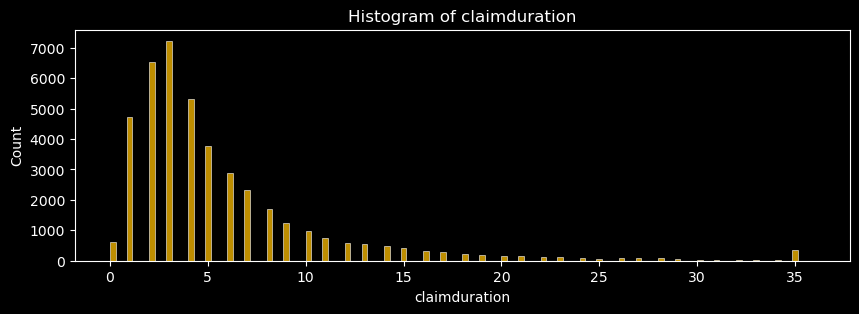

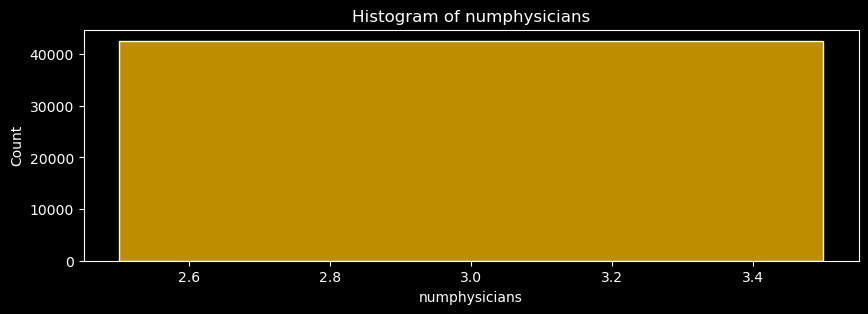

In [ ]:
# Inpatient data histograms
w.display_numeric_column_histograms(train_in)

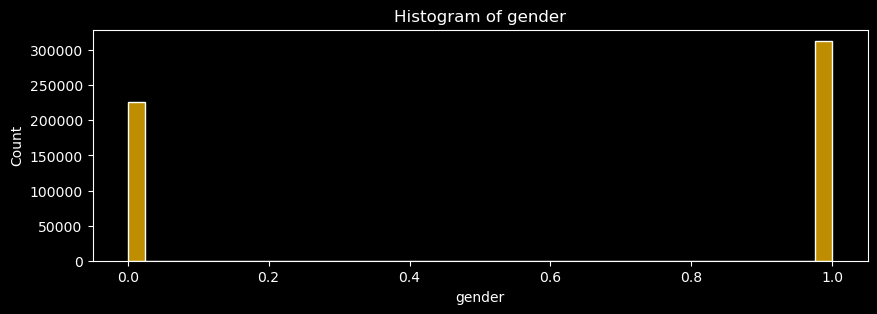

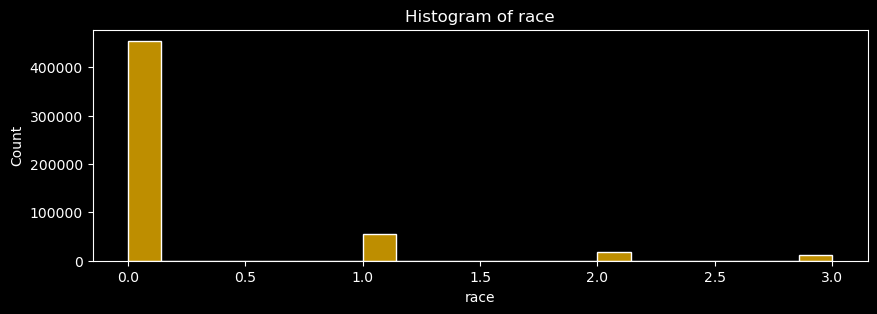

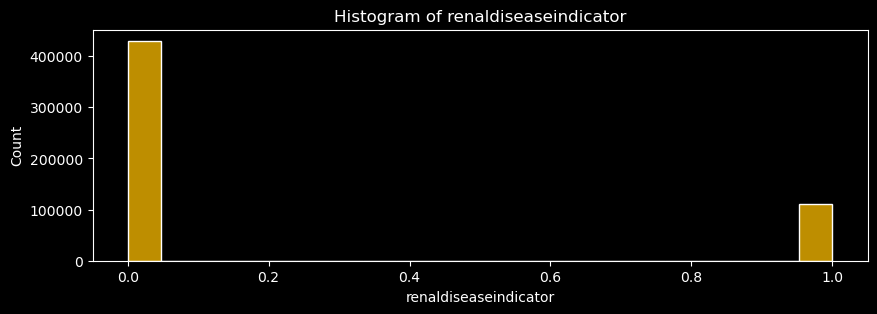

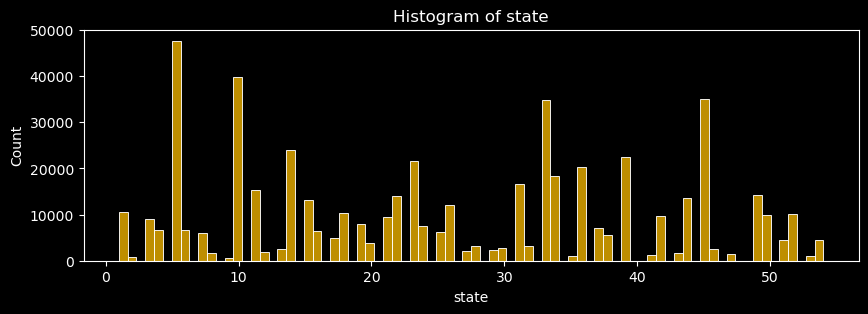

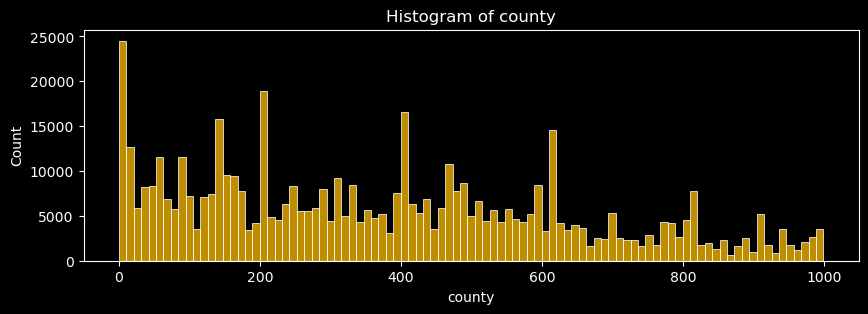

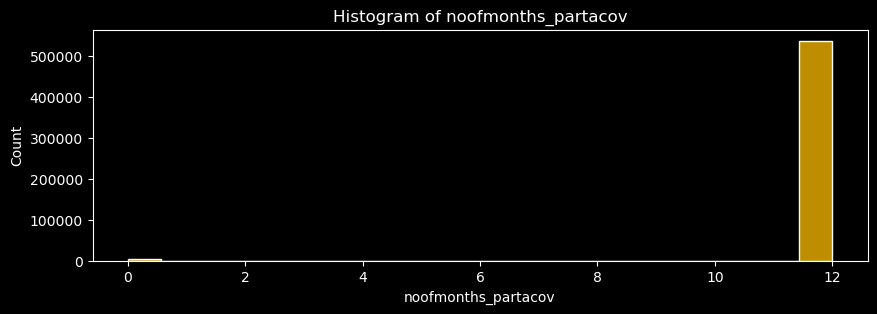

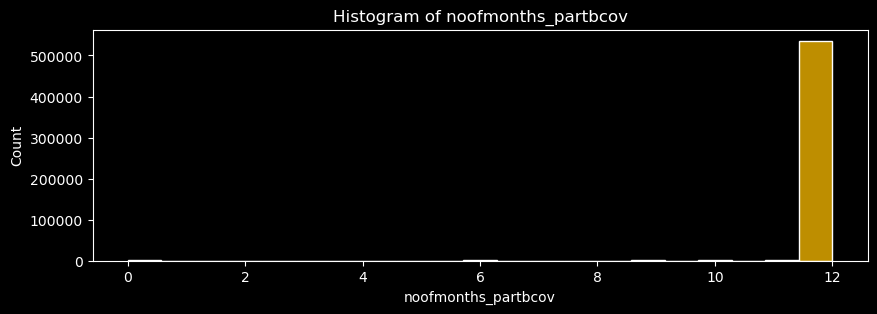

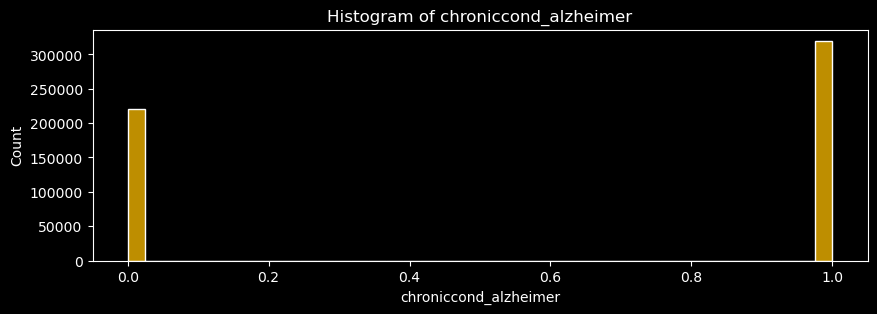

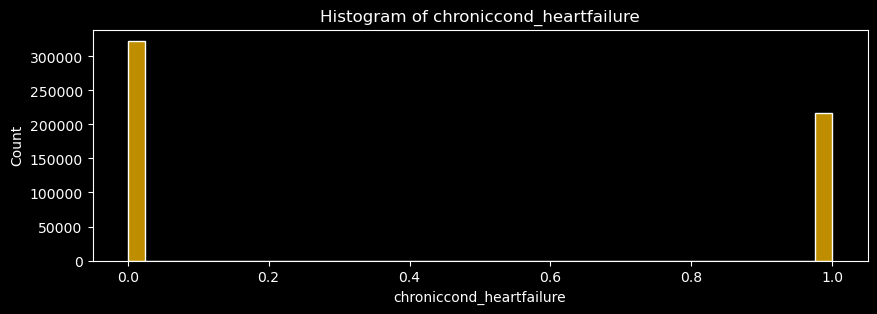

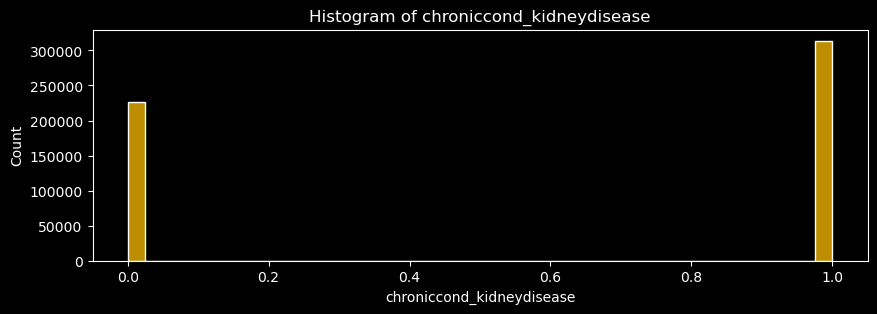

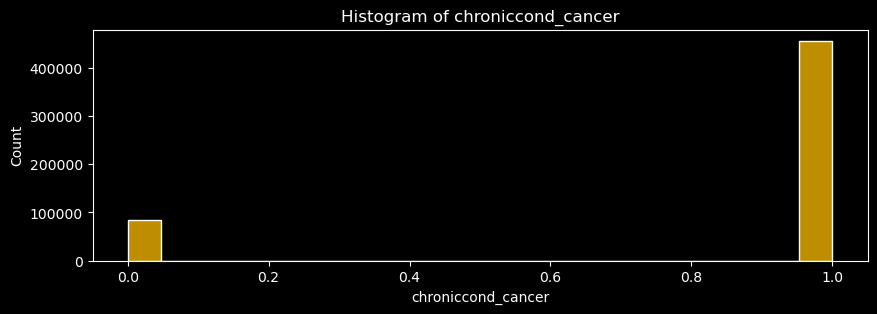

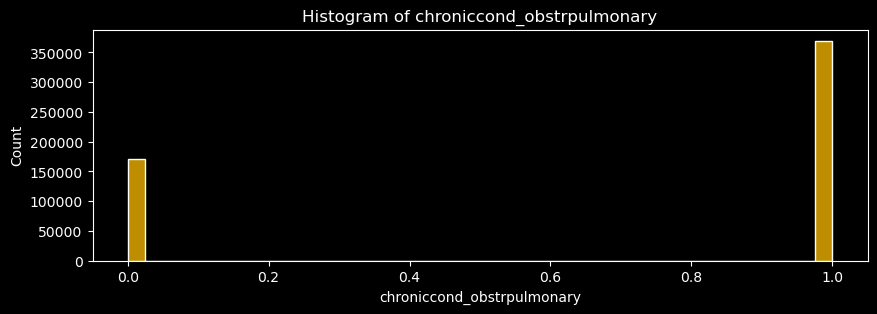

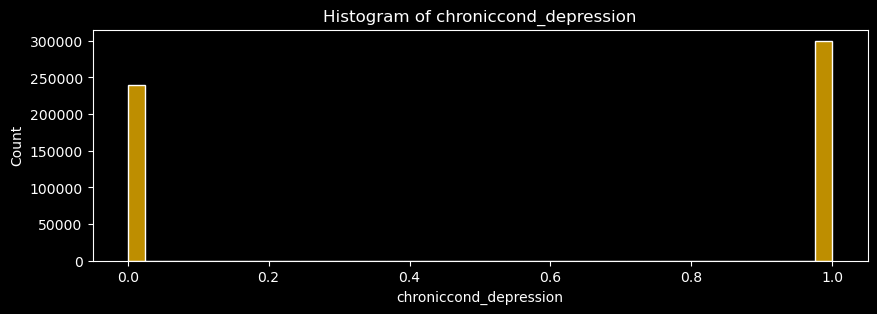

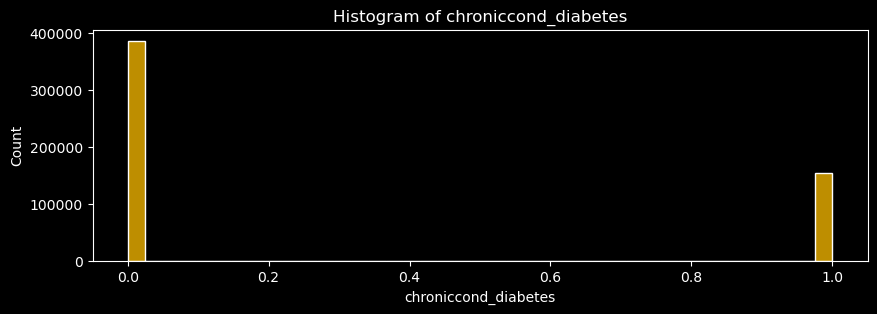

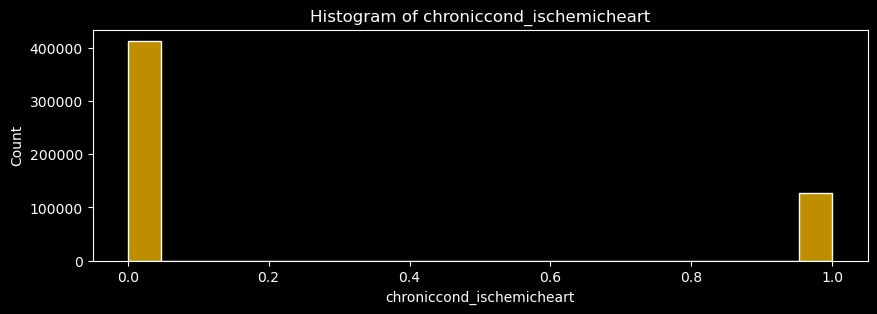

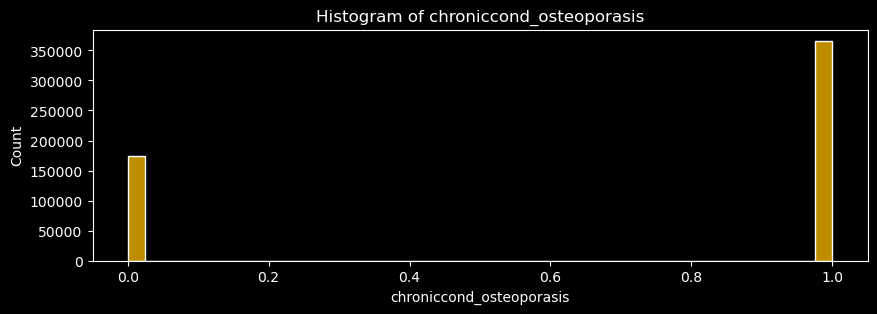

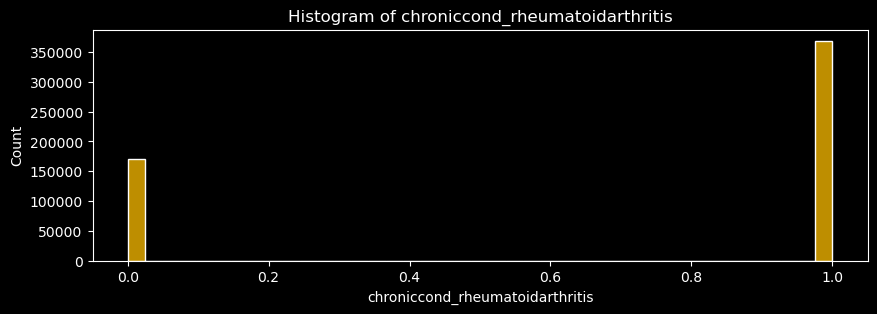

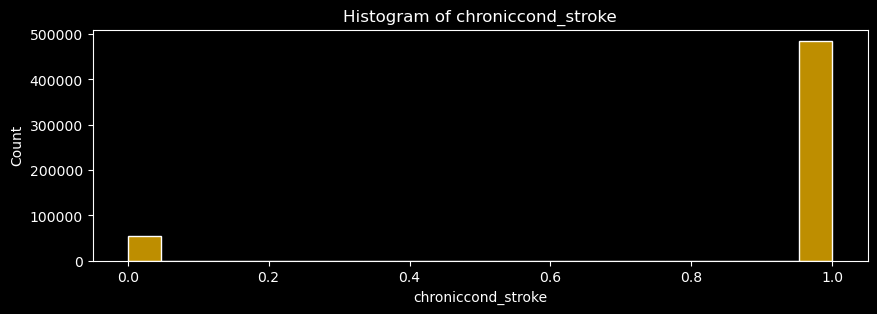

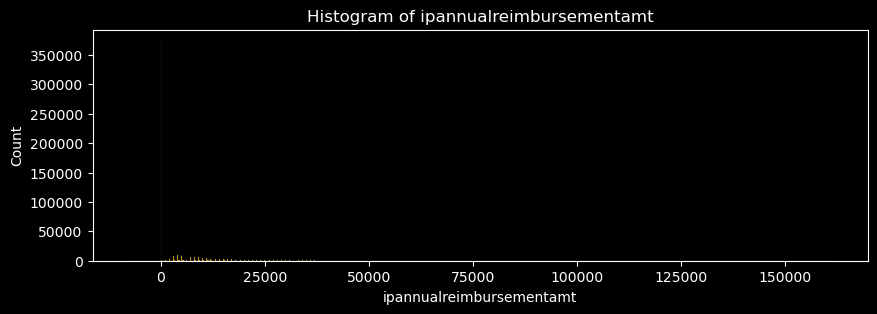

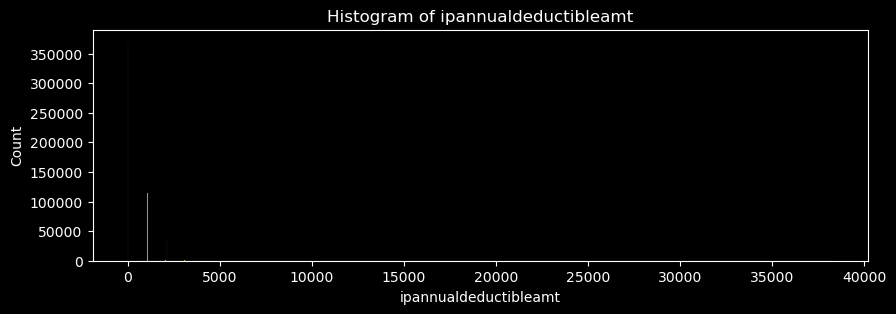

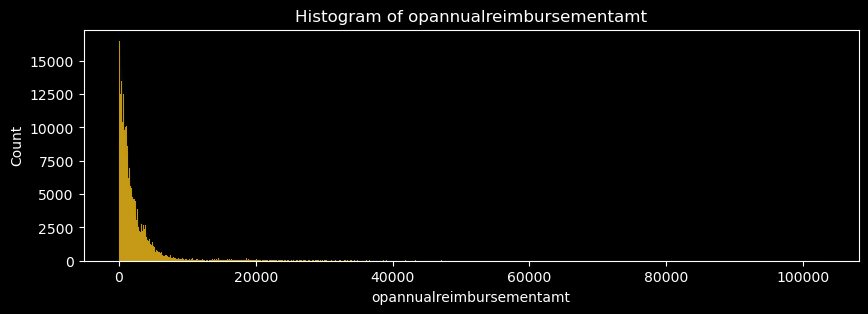

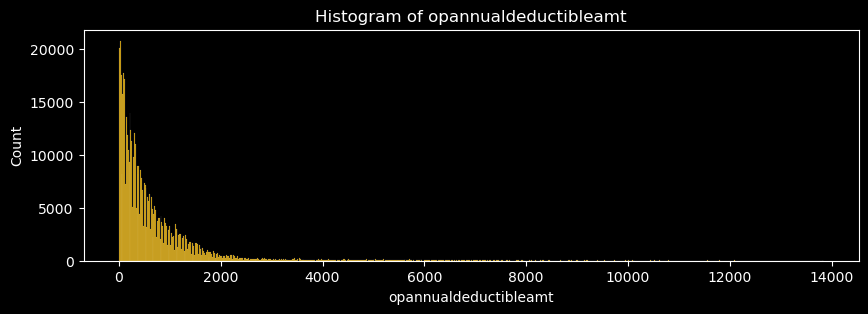

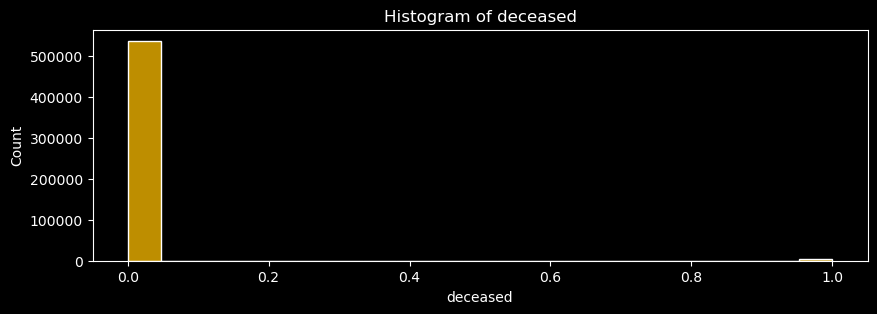

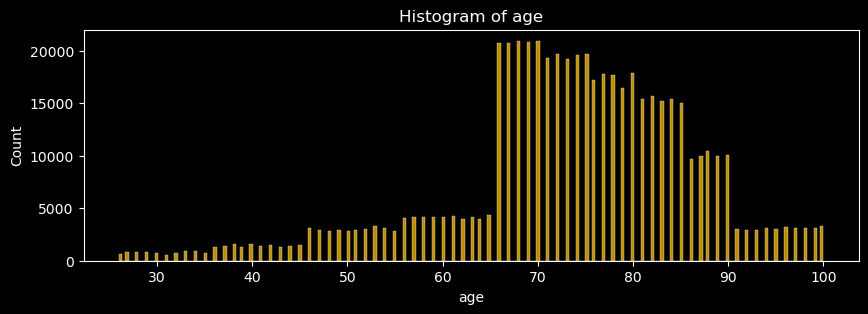

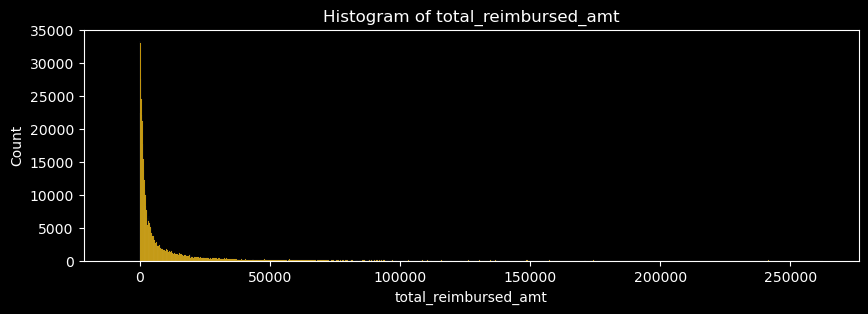

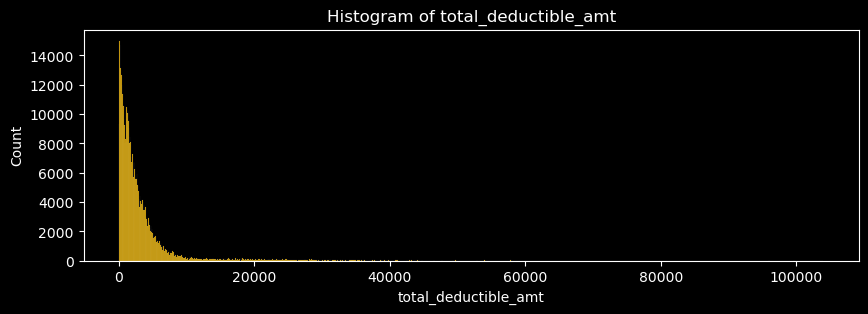

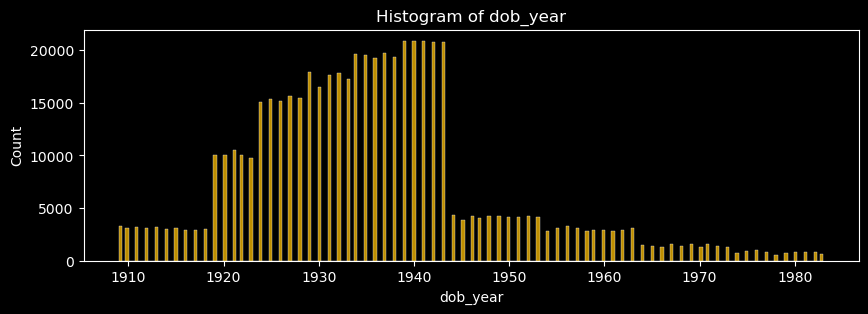

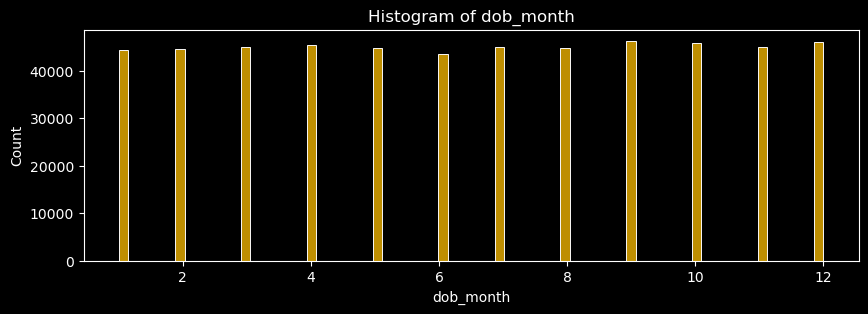

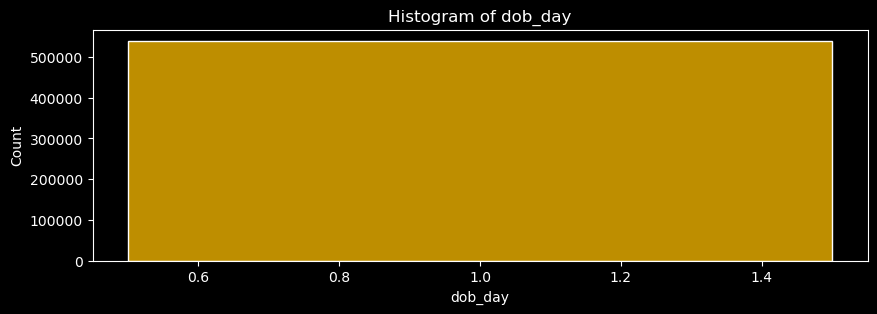

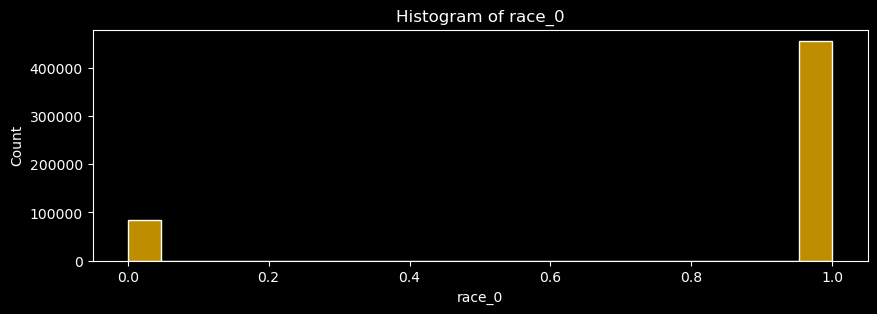

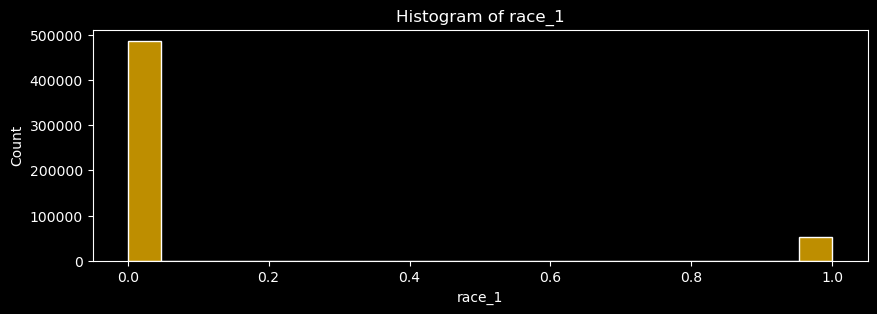

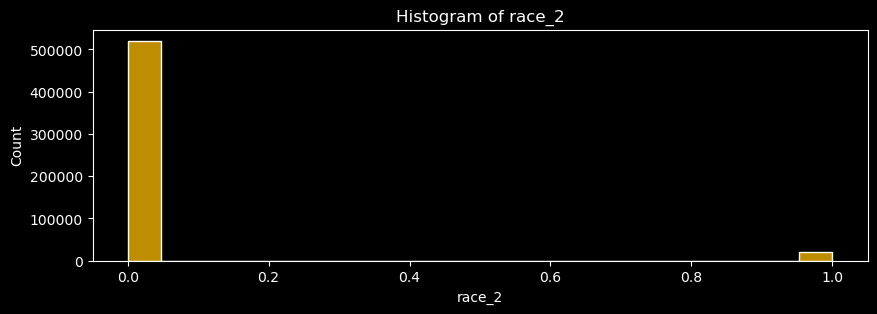

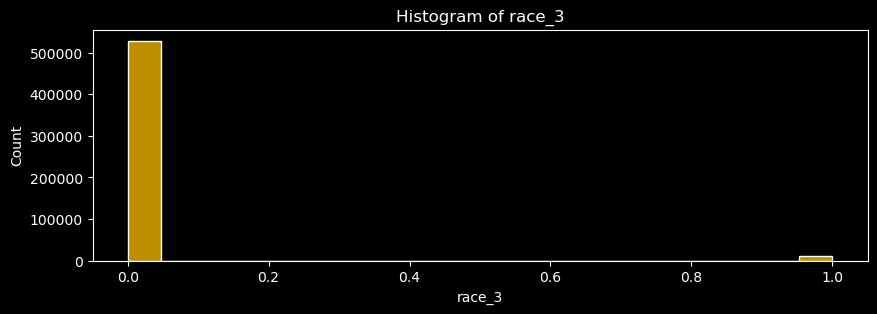

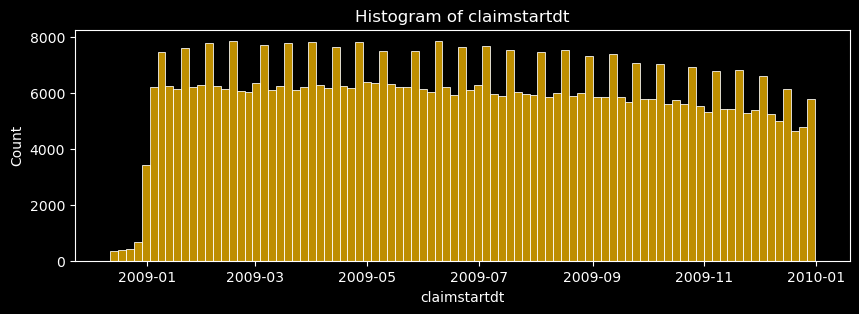

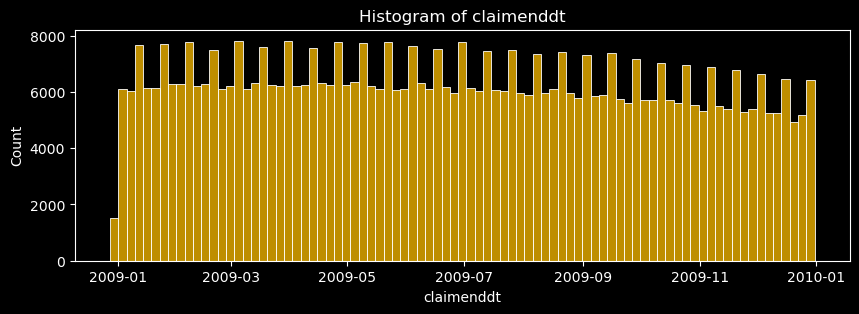

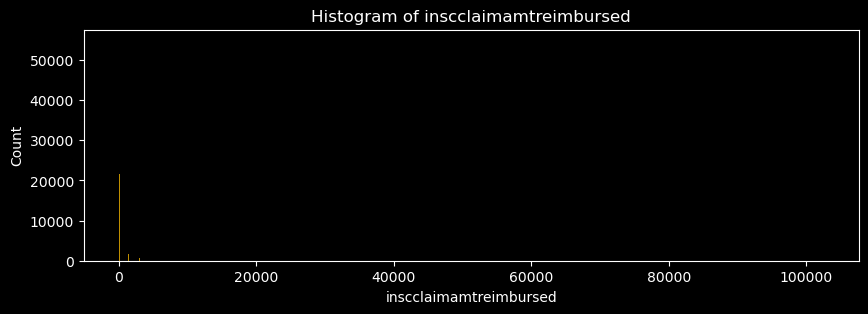

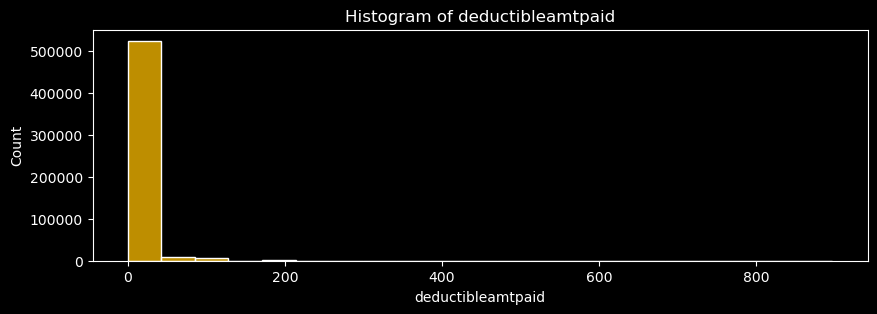

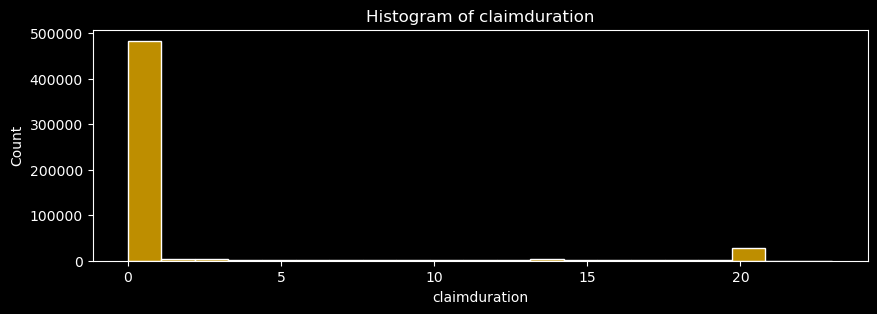

In [ ]:
# Outpatient data histograms
w.display_numeric_column_histograms(train_out)

# Scale Data

In [ ]:
scaler_out = RobustScaler()

cols_to_scale = ['ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt']

for col in cols_to_scale:
    train_out[col] = scaler_out.fit_transform(train_out[[col]])

In [ ]:
scaler_in = RobustScaler()

cols_to_scale = ['ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt']

for col in cols_to_scale:
    train_in[col] = scaler_in.fit_transform(train_in[[col]])


#### What Claim Diagnostic codes are accosiated with fraud? (Outpatient)

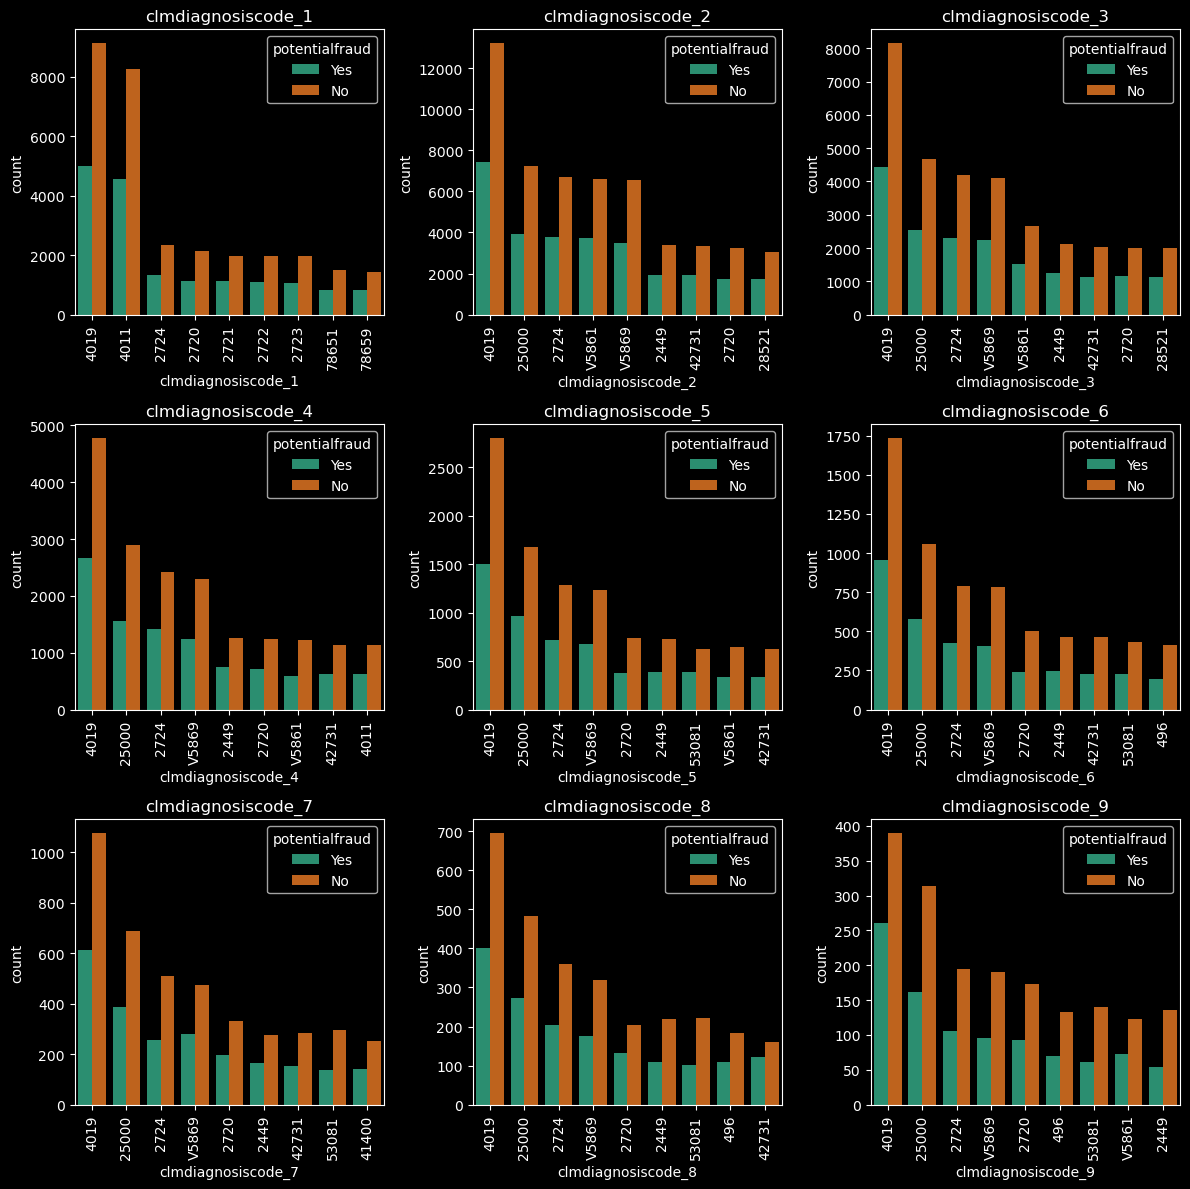

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    column_name = f'clmdiagnosiscode_{i+1}'
    code_counts = train_out[column_name].value_counts()[:10]
    
    # Exclude values equal to '00000'
    code_counts = code_counts[code_counts.index != '00000']
    
    sns.countplot(data=train_out, x=column_name, hue='potentialfraud', ax=ax, order=code_counts.index, palette='Dark2')
    ax.set_title(column_name)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

    - Takeaways 
- Claim Diagnostic code 4019 is the most common code. 

#### How many of the claims submitted by the top 10 providers are fraud? 

In [ ]:
# Outpatient Fraud Yes 
outpatient_fraud_df = train_out[train_out.potentialfraud == 'Yes']
# Inpatient Fraud Yes 
inpatient_fraud_df = train_in[train_in.potentialfraud == 'Yes']

print(f'Sum of outpatient -> {outpatient_fraud_df.claimid.count()}')
print(sep_line)
print(f'Sum of intpatient -> {inpatient_fraud_df.claimid.count()}')

Sum of outpatient -> 192870
Sum of intpatient -> 24574


In [ ]:
# Outpatient Fraud No 
outpatient_NOT_fraud_df = train_out[train_out.potentialfraud == 'No']
# Inpatient Fraud No
inpatient_NOT_fraud_df = train_in[train_in.potentialfraud == 'No']

print(f'Sum of outpatient -> {outpatient_NOT_fraud_df.claimid.count()}')
print(sep_line)
print(f'Sum of intpatient -> {inpatient_NOT_fraud_df.claimid.count()}')

Sum of outpatient -> 347207
Sum of intpatient -> 18039


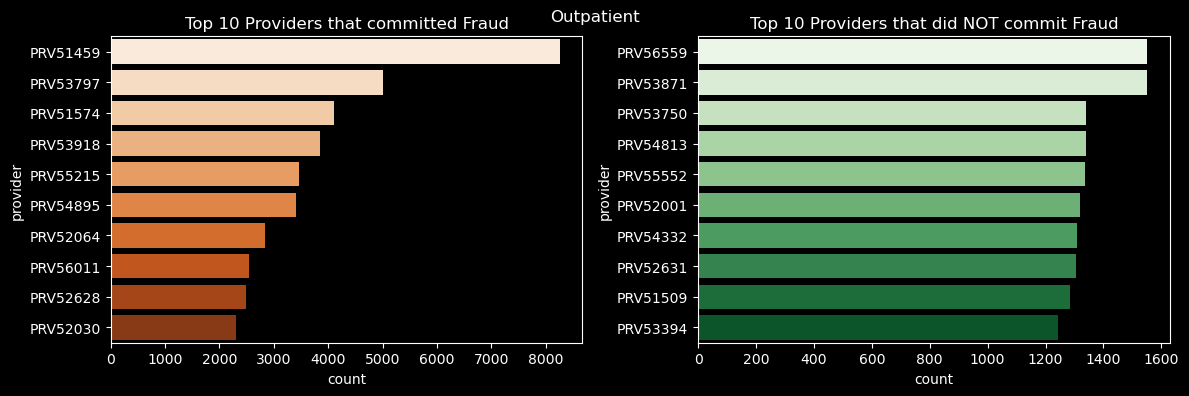

In [ ]:
# OutPatient

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

provider_fraud = train_out['provider'].value_counts()[:10]
provider_not_fraud = outpatient_NOT_fraud_df['provider'].value_counts()[:10]

sns.countplot(data=outpatient_fraud_df, y='provider', ax=axes[0], order=provider_fraud.index, palette='Oranges')
axes[0].set_title('Top 10 Providers that committed Fraud')

sns.countplot(data=outpatient_NOT_fraud_df, y='provider', ax=axes[1], order=provider_not_fraud.index, palette='Greens')
axes[1].set_title('Top 10 Providers that did NOT commit Fraud')

plt.tight_layout()
plt.suptitle("Outpatient")
plt.show()

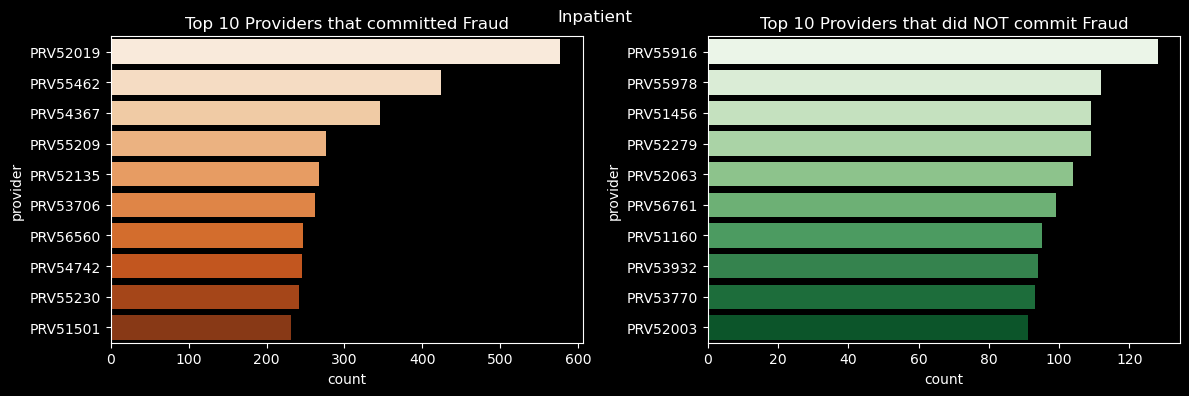

In [ ]:
# InPatient

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

provider_fraud = inpatient_fraud_df['provider'].value_counts()[:10]
provider_not_fraud = inpatient_NOT_fraud_df['provider'].value_counts()[:10]

sns.countplot(data=inpatient_fraud_df, y='provider', ax=axes[0], order=provider_fraud.index, palette='Oranges')
axes[0].set_title('Top 10 Providers that committed Fraud')

sns.countplot(data=inpatient_NOT_fraud_df, y='provider', ax=axes[1], order=provider_not_fraud.index, palette='Greens')
axes[1].set_title('Top 10 Providers that did NOT commit Fraud')

plt.tight_layout()
plt.suptitle("Inpatient")
plt.show()

### What percent of providers are submitting fradulnent claims? 

In [ ]:
percentage_provider_fraud_i = round(len(inpatient_fraud_df.claimid) / (len(inpatient_fraud_df.claimid) + len(inpatient_NOT_fraud_df.claimid)) * 100, 2)
percentage_provider_fraud_o = round(len(outpatient_fraud_df.claimid) / (len(outpatient_fraud_df.claimid) + len(outpatient_NOT_fraud_df.claimid)) * 100, 2)

print(f'Percentage of Inpatient Providers committing fraud: {percentage_provider_fraud_i}%')
print(sep_line)
print(f'Percentage of Outpatient Providers committing fraud: {percentage_provider_fraud_o}%')

Percentage of Inpatient Providers committing fraud: 57.67%
Percentage of Outpatient Providers committing fraud: 35.71%


<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare---Explore <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> ---MODEL</strong>  --- Deliver
    </div>
</div>


# Feature Selection 

In [ ]:
# feature_importance_out = pd.DataFrame({'Feature': train_out.columns, 'Importance': feature_importances})


In [ ]:
# Outpatient

X_train1 = train_out[['age', 'ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 
    'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt','chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke']]
y_train1 = train_out.potentialfraud

X_validate1 = validate_out[['age', 'ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 
    'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt','chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke']]
y_validate1 = validate_out.potentialfraud

X_test1 = test_out[['age', 'ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 
    'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt','chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke']]
y_test1 = test_out.potentialfraud

In [ ]:
# Inpatient

X_train2 = train_in[['age', 'ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 
    'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt']]
y_train2 = train_in.potentialfraud

X_validate2 = validate_in[['age', 'ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 
    'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt']]
y_validate2 = validate_in.potentialfraud

X_test2 = test_in[['age', 'ipannualreimbursementamt', 'inscclaimamtreimbursed', 'claimduration', 
    'deductibleamtpaid', 'total_deductible_amt', 'total_reimbursed_amt']]
y_test2 = test_in.potentialfraud

# BaseLine

In [ ]:
inpatient_baseline_accuracy = (inpatient_df['potentialfraud'].value_counts().idxmax() == inpatient_df.potentialfraud).mean()
outpatient_baseline_accuracy = (outpatient_df['potentialfraud'].value_counts().idxmax() == outpatient_df.potentialfraud).mean()

print(f'Outpatient Baseline accuracy -> {outpatient_baseline_accuracy}')
print(sep_line)
print(f'Inpatient Baseline accuracy -> {inpatient_baseline_accuracy}')

Outpatient Baseline accuracy -> 0.6428846627211335
Inpatient Baseline accuracy -> 0.5766941896542954


###  Model Selection
### Tried : 
-  ### Logistic Regression
-  ###  Random Forest
-  ### K-Nearest Neighbors (KNN)
-  ### Decision Tree

# xgboost 

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

xgb_model = XGBClassifier(objective='binary:logistic', random_state=117)
xgb_model.fit(X_train1, y_train1)
xgb_y_val_pred = xgb_model.predict(X_validate1)
# Evaluate the XGBoost model
accuracy = accuracy_score(y_validate1, xgb_y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

In [ ]:
break 

# AdaBoostClassifier (Outpatient)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

base_model = DecisionTreeClassifier(max_depth=1)  # The weak classifier (often a decision stump)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=117)
adaboost_model.fit(X_train1, y_train1)
adaboost_y_val_pred = adaboost_model.predict(X_validate1)
accuracy = accuracy_score(y_validate1, adaboost_y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6064


# AdaBoostClassifier (Inpatient)

In [ ]:
base_model = DecisionTreeClassifier(max_depth=1)  # The weak classifier (often a decision stump)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=117)
adaboost_model.fit(X_train2, y_train2)
adaboost_y_val_pred = adaboost_model.predict(X_validate2)
accuracy = accuracy_score(y_validate2, adaboost_y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5765


# Decision Tree (Outpatient)

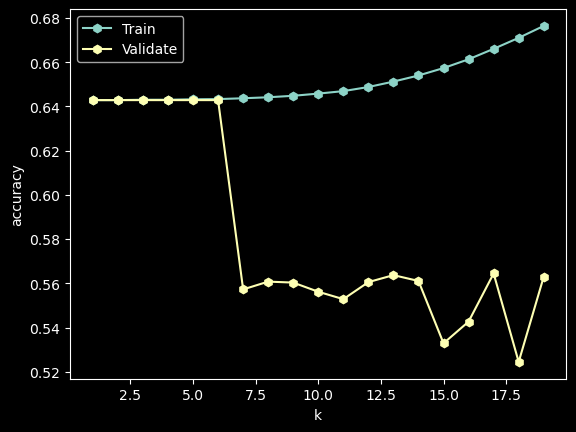

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train1, y_train1)
    train_score.append(clf.score(X_train1, y_train1))
    validate_score.append(clf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
list_of_values = ['chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke']

for val in list_of_values:
    print(len(train_out[val].value_counts()))

2
2
2
2
2
2
2
2
2
2
2


In [ ]:
list_of_values = ['clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9']

for val in list_of_values:
    print(len(train_out[val].value_counts()))

10111
4809
4224
3713
3190
2747
2447
2105
1743


In [ ]:

clf = DecisionTreeClassifier(max_depth=7, random_state=117)
clf.fit(X_train1, y_train1)
dt_tr_acc = clf.score(X_train1, y_train1)
dt_val_acc = clf.score(X_validate1, y_validate1)

In [ ]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
64.372117%

Validation Accuracy:
55.723549%

Baseline Accuracy:
64.288466%


# Decision Tree (Inpatient)

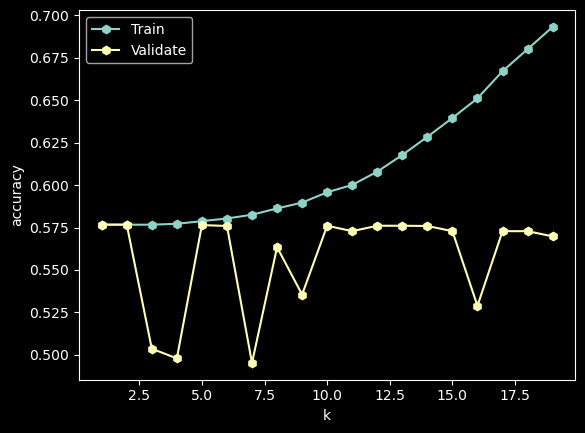

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train2, y_train2)
    train_score.append(clf.score(X_train2, y_train2))
    validate_score.append(clf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state=117)
clf.fit(X_train2, y_train2)
dt_tr_acc = clf.score(X_train2, y_train2)
dt_val_acc = clf.score(X_validate2, y_validate2)

In [ ]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
59.580410%

Validation Accuracy:
57.606383%

Baseline Accuracy:
57.669419%


# Random Forest (Outpatient)

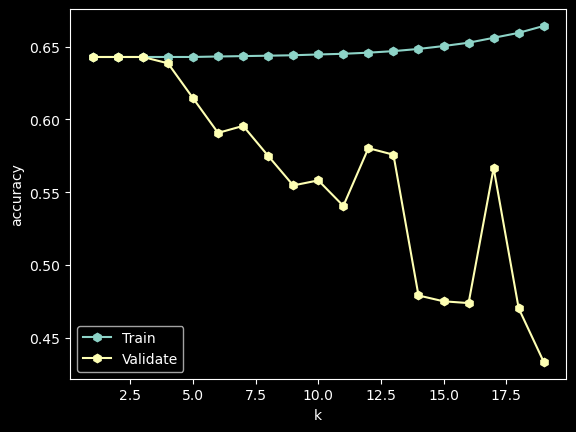

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117)
    rf.fit(X_train1, y_train1)
    train_score.append(rf.score(X_train1, y_train1))
    validate_score.append(rf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
rf = KNeighborsClassifier(n_neighbors=5)
rf.fit(X_train1, y_train1)
rf_tr_acc = rf.score(X_train1,y_train1)
rf_val_acc = rf.score(X_validate1, y_validate1)

In [ ]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
71.526468%

Validation Accuracy:
62.535149%

Baseline Accuracy:
64.288466%


# Random Forest (Inpatient)

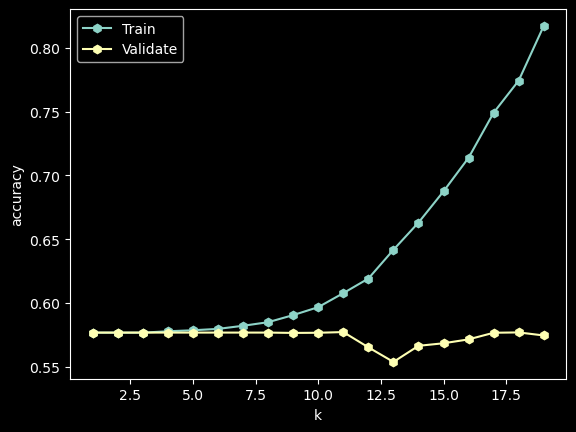

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117)
    rf.fit(X_train2, y_train2)
    train_score.append(rf.score(X_train2, y_train2))
    validate_score.append(rf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
rf = KNeighborsClassifier(n_neighbors=7)
rf.fit(X_train2, y_train2)
rf_tr_acc = rf.score(X_train2,y_train2)
rf_val_acc = rf.score(X_validate2, y_validate2)

In [ ]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
69.915284%

Validation Accuracy:
57.672872%

Baseline Accuracy:
57.669419%


# KNearest Neighbor (Outpatient)

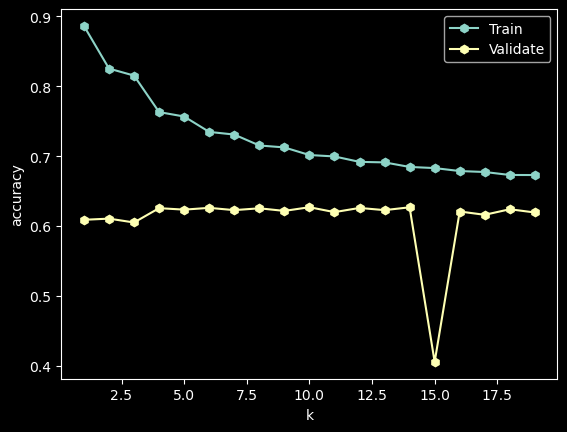

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    train_score.append(knn.score(X_train1, y_train1))
    validate_score.append(knn.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train1, y_train1)
knn_tr_acc = knn1.score(X_train1,y_train1)
knn_val_acc = knn1.score(X_validate1, y_validate1)

In [ ]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
70.158329%

Validation Accuracy:
62.690435%

Baseline Accuracy:
64.288466%


# KNearest Neighbor (Inpatient)

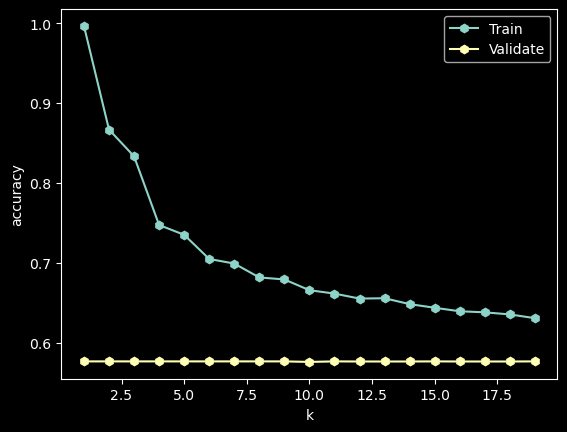

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2, y_train2)
    train_score.append(knn.score(X_train2, y_train2))
    validate_score.append(knn.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train2, y_train2)
knn_tr_acc = knn2.score(X_train2,y_train2)
knn_val_acc = knn2.score(X_validate2, y_validate2)

In [ ]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
66.580621%

Validation Accuracy:
57.606383%

Baseline Accuracy:
57.669419%


# Logistic Regression (Outpatient)

In [ ]:
lr1 = LogisticRegression(random_state=117)
lr1.fit(X_train1, y_train1)
lr_tr_acc1 = lr1.score(X_train1,y_train1)

lr1.fit(X_validate1, y_validate1)
lr_val_acc1 = lr1.score(X_validate1, y_validate1)

In [ ]:
print(f'Logistic Regression Model Accuracy Scores:\n\n\
Baseline Accuracy Score:\n{outpatient_baseline_accuracy:2%}\n\n\
Model Train Accuracy Score:\n{lr_tr_acc1:2%}\n\
Model Validate Accuracy Score:\n{lr_val_acc1:2%}')

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
64.288466%

Model Train Accuracy Score:
64.288426%
Model Validate Accuracy Score:
64.288412%


# Logistic Regression (Inpatient)

In [ ]:
lr2 = LogisticRegression(random_state=117)
lr2.fit(X_train2, y_train2)
lr_tr_acc2 = lr2.score(X_train2,y_train2)

lr2.fit(X_validate2, y_validate2)
lr_val_acc2 = lr2.score(X_validate2, y_validate2)

In [ ]:
print(f'Logistic Regression Model Accuracy Scores:\n\n\
Baseline Accuracy Score:\n{inpatient_baseline_accuracy:2%}\n\n\
Model Train Accuracy Score:\n{lr_tr_acc2:2%}\n\
Model Validate Accuracy Score:\n{lr_val_acc2:2%}')

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
57.669419%

Model Train Accuracy Score:
57.667848%
Model Validate Accuracy Score:
57.672872%


<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare---Explore---Model <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> ---DELIVER</strong>  
    </div>
</div>


### Model to deliver: 

## Conclusion:
 
Trained Model:
MAE: 2636.42
MSE: 55,712,688.56
    
    
    
Baseline Model:
MAE: 2827.80
MSE: 72,293,000.37.               



Test Model:
Mean Absolute Error: 2160.821729290517
Mean Squared Error: 8305312.8198176725 



Summary:- The "Test Model" with a Mean Absolute Error (MAE) of approximately 2160.82 and a Mean Squared Error (MSE) of approximately 8,305,312.82 outperforms the "Baseline Model" and the "Trained Model" on both MAE and MSE, making it the best choice against the baseline.


 

## Acctionable Recommendations:

- Implement more advanced machine learning models to predict potentially fraudulent claims.

- Take strict legal actions against fraud.  

 - Establish thorough documentation and audit trails for healthcare transactions.


## Next Steps:

 - Continuously evaluate and update fraud prevention strategies.

 - Enhance fraud detection models and algorithms.
 
 - Promote whistleblower programs and legal actions.

Medicare data is protected. This information has not been publicly disclosed and may be privileged and confidential. It is for government use only and must not be disseminated, distributed, or copied to persons not authorized to receive the information. Unauthorized disclosure may result in prosecution to the full extent of the law.